# **9-Player Radar**

## 1) Data

In [1]:

# make sure you have done pip install selenium
from selenium import webdriver
from selenium.webdriver.common.by import By
import urllib
import json
import yaml

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patheffects as path_effects
import matplotlib.font_manager as fm
import matplotlib.colors as mcolors
from matplotlib import cm
from highlight_text import fig_text, ax_text
from matplotlib.colors import LinearSegmentedColormap, NoNorm
from matplotlib import cm
import matplotlib.gridspec as gridspec
import numpy as np
from mplsoccer import PyPizza, add_image, FontManager
from mplsoccer import Pitch, VerticalPitch
import cmasher as cmr
import matplotlib.patches as mpatches
from matplotlib.patches import RegularPolygon
from PIL import Image
import urllib
import json
import os
import math
from selenium.webdriver.chrome.service import Service
#import modules and packages
import requests
from bs4 import BeautifulSoup
import json
import datetime
from ast import literal_eval
from scipy import stats
from scipy.spatial import ConvexHull
from matplotlib.collections import LineCollection
from matplotlib.patches import Polygon



from matplotlib.colors import LinearSegmentedColormap  
pearl_earring_cmap = LinearSegmentedColormap.from_list("Pearl Earring - 10 colors",
                                                       ['#15242e', '#4393c4'], N=10)

red_cmap = LinearSegmentedColormap.from_list("Pearl Earring - 10 colors",
                                                       ['#FFBEBE', '#FF0000'], N=10)
el_greco_violet_cmap = LinearSegmentedColormap.from_list("El Greco Violet - 10 colors",
                                                         ['#332a49', '#8e78a0'], N=10)
el_greco_yellow_cmap = LinearSegmentedColormap.from_list("El Greco Yellow - 10 colors",
                                                         ['#7c2e2a', '#f2dd44'], N=10)
flamingo_cmap = LinearSegmentedColormap.from_list("Flamingo - 10 colors",
                                                  ['#e3aca7', '#c03a1d'], N=10)
# same color maps but with 100 colors
pearl_earring_cmap_100 = LinearSegmentedColormap.from_list("Pearl Earring - 100 colors",
                                                           ['#15242e', '#4393c4'], N=100)
el_greco_violet_cmap_100 = LinearSegmentedColormap.from_list("El Greco Violet - 100 colors",
                                                             ['#3b3154', '#8e78a0'], N=100)
el_greco_yellow_cmap_100 = LinearSegmentedColormap.from_list("El Greco Yellow - 100 colors",
                                                             ['#7c2e2a', '#f2dd44'], N=100)
flamingo_cmap_100 = LinearSegmentedColormap.from_list("Flamingo - 100 colors",
                                                      ['#e3aca7', '#c03a1d'], N=100)

In [2]:

liga = pd.read_csv(r"C:\Users\lolen\Downloads\Jupyter Mac\Football Viz\Neurotactic Work\Rating System\Code\Liga\24.csv")


In [3]:
liga = liga.drop_duplicates(subset=['Player', 'Nation', 'Pos', 'Squad'])

In [4]:
liga["npG"] = liga["Goals"] - liga["PK"]
liga["pAdjBlocks"] = liga["pAdjShBlocksPer90"]+liga["pAdjPassBlocksPer90"]

In [5]:
len(liga.columns)

281

## Pizza Plot

In [6]:
import ipywidgets as widgets
players =(liga.Player.unique()).tolist()
names = players[1:]

dropdown = widgets.Dropdown(options=names, description='Select a name:')
selected_name = None  # Variable to store the selected name

def on_dropdown_change(change):
    global selected_name
    selected_name = change.new
    print(f"Selected name: {selected_name}")

dropdown.observe(on_dropdown_change, 'value')

search_box = widgets.Text(placeholder='Search for a name')
def on_search_box_change(change):
    search_name(change.new)

search_box.observe(on_search_box_change, 'value')

def search_name(search_str):
    if search_str:
        matching_names = [name for name in names if search_str.lower() in name.lower()]
        dropdown.options = matching_names
    else:
        dropdown.options = names

widgets.VBox([search_box, dropdown])

Selected name: Abdoulaye Niakhate Ndiaye
Selected name: Abdukodir Khusanov
Selected name: Aaron Cresswell
Selected name: Adri Embarba
Selected name: Alexis Claude-Maurice
Selected name: Adri Embarba
Selected name: Aaron Cresswell
Selected name: Aaron Ramsdale
Selected name: Abde Ezzalzouli
Selected name: Declan Rice
Selected name: Lukáš Hrádecký
Selected name: Abde Ezzalzouli
Selected name: Aaron Ramsdale
Selected name: Aaron Cresswell
Selected name: Adam Dźwigała
Selected name: Aaron Cresswell
Selected name: Andrew Robertson
Selected name: Antonee Robinson
Selected name: Aaron Wan-Bissaka
Selected name: Justin Kluivert
Selected name: Aaron Cresswell
Selected name: Alex Iwobi
Selected name: Chris Wood
Selected name: Abde Ezzalzouli
Selected name: Almugera Kabar
Selected name: Manuel Ugarte Ribeiro
Selected name: None
Selected name: Rodrigo De Paul


In [8]:
selected_name

'Martín Zubimendi'

In [7]:
liga["Comp"].unique()

array(['it Serie A', 'eng Premier League', 'fr Ligue 1', 'es La Liga',
       'de Bundesliga'], dtype=object)

## 1)Attack

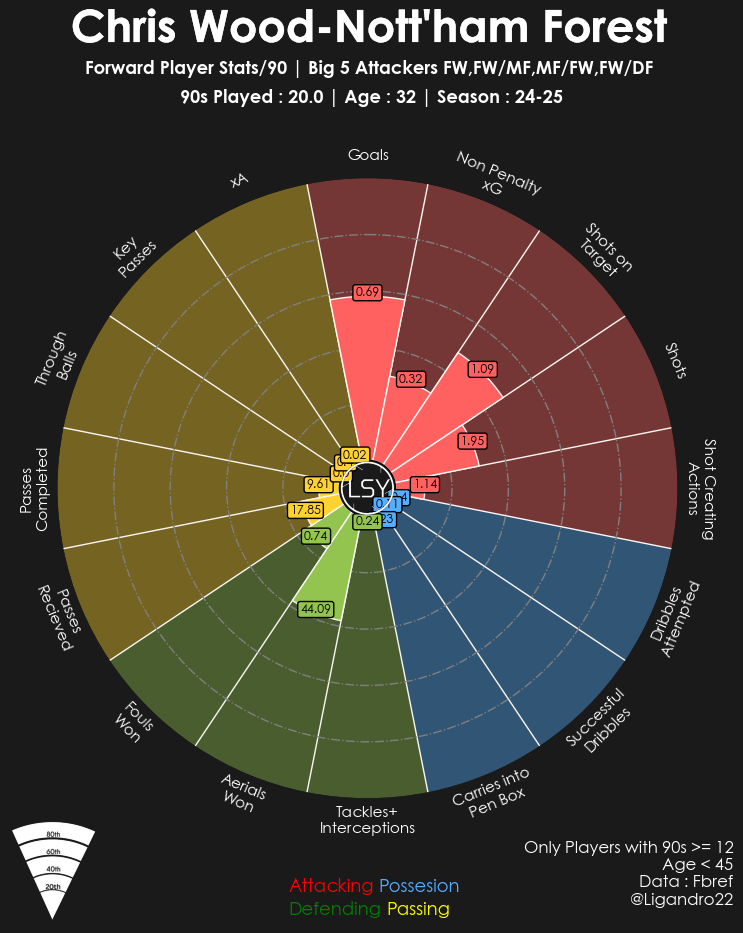

In [11]:
# a3 = "eng Premier League"
# a3 = "es La Liga"
# a3 = "it Serie A"
# a3 = "fr Ligue 1"
# a3 = "de Bundesliga"
a3 = "Big 5"
if a3 != "Big 5":
    prem = liga[liga["Comp"] == a3]
    League = a3[3:]
else:
    prem = liga.copy()
    League = a3
minutes = int(input("90s"))
age_limit = int(input("Age limit"))
prem = prem[prem["Min"] >= minutes*90 ]
if age_limit == 0 :
    prem = prem
else :
    prem = prem[prem["Age"] < age_limit]
x =selected_name
player = prem.loc[prem['Player']==x]
time = float(player.iloc[0,7])
Name = str(player.iloc[0,0])
Team = str(player.iloc[0,3])
age =player.iloc[0,6]

kik = prem[(prem["Pos"] == "FW") | (prem["Pos"] == "FW,DF") | (prem["Pos"] == "FW,MF")| (prem["Pos"] == "MF,FW")]

# select stats
playe = list(player.iloc[0])

stat = []
stat.extend([playe[135],playe[148],playe[137],playe[136],playe[189],
        playe[228],playe[229],playe[238],
        playe[261],playe[269],playe[247],
        playe[241],playe[152] ,playe[178],playe[170],playe[168]])
lis = [135,148,137,136,189,228,229,238,261,269,247,241,152,178,170,168]
params = []
for x in lis:
    params.append(liga.columns[x])
params[0] = "Goals"
params[1] = "Non Penalty\nxG"
params[2] = "Shots on\nTarget"
params[3] = "Shots"
params[4] = "Shot Creating\nActions"
params[5] = "Dribbles\nAttempted"
params[6] = "Successful\nDribbles"
params[7] = "Carries into\nPen Box"
params[8] = "Tackles+\nInterceptions"
params[9] = "Aerials\nWon"
params[10] = "Fouls\nWon"
params[11] = "Passes\nRecieved"
params[12] = "Passes\nCompleted"
params[13] = "Through\nBalls"
params[14] = "Key\nPasses"
params[15] = "xA"





# minimum range value and maximum range value for parameters
min_range= []
max_range =[]
for x in lis:
    min_range.append(kik.iloc[:,x].min())
    max_range.append(kik.iloc[:,x].max())          
stat1 = [ round(x, 2) for x in stat] 
stat1        
# color for the slices and text
slice_colors = ["#FF6161"] * 5 + ["#56AEFF"] * 3 + ["#94C450"] * 3 + ["#FFD230"] * 5
text_colors = ["black"] * 16 

# instantiate PyPizza class
baker = PyPizza(
    params=params,
    min_range=min_range,        # min range values
    max_range=max_range, 
    background_color="#FAF7F3",
    straight_line_color="#FAF7F3",  # color for straight lines
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_lw=0,               # linewidth of last circle
    other_circle_lw=1,              # linewidth for other circles
    inner_circle_size=10,
    other_circle_ls="-." 
)

colors = []
for x in params:
    colors.append("#EFEEED")
# plot pizza
fig, ax = baker.make_pizza(
    stat1,                          # list of values
    figsize=(8, 8.5),                # adjust figsize according to your need
    color_blank_space=slice_colors,        # use same color to fill blank space
    slice_colors=slice_colors,       # color for individual slices
    value_colors=text_colors,        # color for the value-text
    value_bck_colors=slice_colors,   # color for the blank spaces
    blank_alpha=0.4,                 # alpha for blank-space colors
    kwargs_slices=dict(
        edgecolor="#FAF7F3", zorder=2, linewidth=1
    ),                               # values to be used when plotting slices
    kwargs_params=dict(
        font = "STXihei",size =11,color="white",fontweight="bold", va="center"
    ),                               # values to be used when adding parameter
    kwargs_values=dict(
        font = "STXihei",size =9,color="white",fontweight="bold", zorder=3,
        bbox=dict(
        edgecolor="#000000", facecolor="cornflowerblue",
        boxstyle="round,pad=0.2", lw=1
        )
    )    
)


fig.set_facecolor('#1A1A1A')
ax.patch.set_facecolor('#1A1A1A')


# add title
fig.text(
0.515, 1.02, f"{Name}-{Team}",
path_effects=[path_effects.Stroke(linewidth=0.2, foreground="white"), path_effects.Normal()],
ha="center", font = "Century Gothic",size =32,color="white",fontweight="bold"
)

# add subtitle
fig.text(
0.515, 0.982,
f"Forward Player Stats/90 | {League} Attackers FW,FW/MF,MF/FW,FW/DF",
ha="center", font = "Century Gothic",size =13,color="white",fontweight="bold"
)
fig.text(
0.515, 0.948,
f" 90s Played : {time} | Age : {2023-age} | Season : 24-25",
ha="center", font = "Century Gothic",size =13,color="white",fontweight="bold"
)



# add credits
notes = f'Only Players with 90s >= {minutes}'
notes2 = f'Age < {age_limit}'
CREDIT_1 = "Data : Fbref"
CREDIT_2 = "@Ligandro22"

fig.text(
0.97, 0.005, f"{notes}\n{notes2}\n{CREDIT_1}\n{CREDIT_2}",
font = "STXihei",size =12,color="white",fontweight="bold",
ha="right"
)

# add image
im1 = plt.imread(r"C:\Users\lolen\OneDrive\Documents\Coding\Neurotactic Essentials\Images\lsy.png")
ax_image = add_image(
im1, fig, left=0.472, bottom=0.455, width=0.08, height=0.08
) 


    # these values might differ when you are plotting
im3 = plt.imread(r'C:\Users\lolen\Downloads\Jupyter Mac\Football Viz\Neurotactic Work\Rating System\Images\perc.png')
ax_image = add_image(
im3, fig, left=0.06, bottom=-0.015, width=0.12, height=0.12
)   # these values might differ when you are plotting

str_text = f'''<Attacking> <Possesion>\n<Defending> <Passing>'''


fig_text(
    x = 0.414, y = -0.01, 
    s = str_text,highlight_textprops=[{'color':'red', 'weight':'bold'},{'color':'#56AEFF', 'weight':'bold'},{'color':'green', 'weight':'bold'},
                                      {'color':'yellow', 'weight':'bold'}],
    va = 'bottom', ha = 'left',fontname ="STXihei", weight = 'bold',
    fontsize = 13,color ='white'
)
plt.savefig("Pizza24.jpg",dpi =500, bbox_inches='tight')

# # these values might differ when you are plotting
# im3 = plt.imread('https://i.postimg.cc/RFCQnnrz/4.png')
# ax_image = add_image(
# im3, fig, left=0.85, bottom=0.815, width=0.12, height=0.12
# )   # these values might differ when you are plotting 

In [12]:
player 

,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,...,pAdjDrbPastAttPer90,TouchCentrality,Tkl+IntPer600OppTouch,pAdjTouchesPer90,CarriesPer50Touches,ProgCarriesPer50Touches,ProgPassesPer50CmpPasses,Main Position,npG,pAdjBlocks


In [52]:
player 

,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,...,pAdjDrbPastAttPer90,TouchCentrality,Tkl+IntPer600OppTouch,pAdjTouchesPer90,CarriesPer50Touches,ProgCarriesPer50Touches,ProgPassesPer50CmpPasses,Main Position,npG,pAdjBlocks


## 2)Midfield

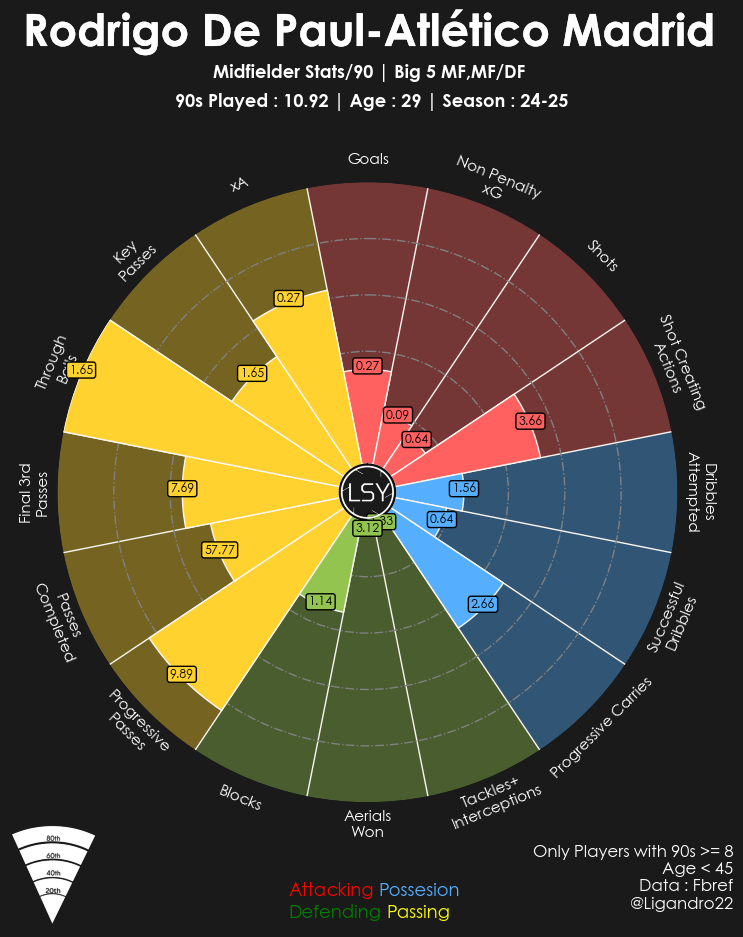

In [13]:
# a3 = "eng Premier League"
# a3 = "es La Liga"
# a3 = "it Serie A"
# a3 = "fr Ligue 1"

# a3 = "de Bundesliga"
a3 = "Big 5"
if a3 != "Big 5":
    prem = liga[liga["Comp"] == a3]
    League = a3[3:]
else:
    prem = liga.copy()
    League = a3
minutes = int(input("90s"))
age_limit = int(input("Age limit"))
prem = prem[prem["Min"] >= minutes*90 ]
if age_limit == 0 :
    prem = prem
else :
     prem = prem[prem["Age"] < age_limit]
x =selected_name
player = prem.loc[prem['Player']==x]
time = float(player.iloc[0,9]/90)
Name = str(player.iloc[0,0])
Team = str(player.iloc[0,3])
age =player.iloc[0,6]

kik = prem[(prem["Pos"] == "MF") | (prem["Pos"] == "MF,DF")]
# select stats
playe = list(player.iloc[0])

stat = []
stat.extend([playe[135],playe[148],playe[136],playe[189],
        playe[228],playe[229],playe[236],
        playe[261],playe[269],playe[280],
        playe[174],playe[152] ,playe[171],playe[178],playe[170],playe[168]])
lis = [135,148,136,189,228,229,236,261,269,280,174,152,171,178,170,168]
params = []
for x in lis:
    params.append(liga.columns[x])
params[0] = "Goals"
params[1] = "Non Penalty\nxG"
params[2] = "Shots"
params[3] = "Shot Creating\nActions"
params[4] = "Dribbles\nAttempted"
params[5] = "Successful\nDribbles"
params[6] = "Progressive Carries"
params[7] = "Tackles+\nInterceptions"
params[8] = "Aerials\nWon"
params[9] = "Blocks"
params[10] = "Progressive\nPasses"
params[11] = "Passes\nCompleted"
params[12] = "Final 3rd\nPasses"
params[13] = "Through\nBalls"
params[14] = "Key\nPasses"
params[15] = "xA"





# minimum range value and maximum range value for parameters
min_range= []
max_range =[]
for x in lis:
    min_range.append(kik.iloc[:,x].min())
    max_range.append(kik.iloc[:,x].max())          
stat1 = [ round(x, 2) for x in stat] 
stat1        
# color for the slices and text
slice_colors = ["#FF6161"] * 4 + ["#56AEFF"] * 3 + ["#94C450"] * 3 + ["#FFD230"] * 6
text_colors = ["black"] * 16 

# instantiate PyPizza class
baker = PyPizza(
    params=params,
    min_range=min_range,        # min range values
    max_range=max_range, 
    background_color="#FAF7F3",
    straight_line_color="#FAF7F3",  # color for straight lines
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_lw=0,               # linewidth of last circle
    other_circle_lw=1,              # linewidth for other circles
    inner_circle_size=10,
    other_circle_ls="-." 
)

colors = []
for x in params:
    colors.append("#EFEEED")
# plot pizza
fig, ax = baker.make_pizza(
    stat1,                          # list of values
    figsize=(8, 8.5),                # adjust figsize according to your need
    color_blank_space=slice_colors,        # use same color to fill blank space
    slice_colors=slice_colors,       # color for individual slices
    value_colors=text_colors,        # color for the value-text
    value_bck_colors=slice_colors,   # color for the blank spaces
    blank_alpha=0.4,                 # alpha for blank-space colors
    kwargs_slices=dict(
        edgecolor="#FAF7F3", zorder=2, linewidth=1
    ),                               # values to be used when plotting slices
    kwargs_params=dict(
        font = "STXihei",size =11,color="white",fontweight="bold", va="center"
    ),                               # values to be used when adding parameter
    kwargs_values=dict(
        font = "STXihei",size =9,color="white",fontweight="bold", zorder=3,
        bbox=dict(
        edgecolor="#000000", facecolor="cornflowerblue",
        boxstyle="round,pad=0.2", lw=1
        )
    )    
)


fig.set_facecolor('#1A1A1A')
ax.patch.set_facecolor('#1A1A1A')


# add title
fig.text(
0.515, 1.02, f"{Name}-{Team}",
path_effects=[path_effects.Stroke(linewidth=0.2, foreground="white"), path_effects.Normal()],
ha="center", font = "Century Gothic",size =32,color="white",fontweight="bold"
)

# add subtitle
fig.text(
0.515, 0.982,
f"Midfielder Stats/90 | {League} MF,MF/DF",
ha="center", font = "Century Gothic",size =13,color="white",fontweight="bold"
)
fig.text(
0.515, 0.948,
f" 90s Played : {time:.2f} | Age : {2023-age} | Season : 24-25",
ha="center", font = "Century Gothic",size =13,color="white",fontweight="bold"
)





# add credits
notes = f'Only Players with 90s >= {minutes}'
if age_limit == 0 :
    notes2 = f'No age filter'
else :
    notes2 = f'Age < {age_limit}'
CREDIT_1 = "Data : Fbref"
CREDIT_2 = "@Ligandro22"

fig.text(
0.97, 0.005, f"{notes}\n{notes2}\n{CREDIT_1}\n{CREDIT_2}",
font = "STXihei",size =12,color="white",fontweight="bold",
ha="right"
)

# add image
im1 = plt.imread(r"C:\Users\lolen\OneDrive\Documents\Coding\Neurotactic Essentials\Images\lsy.png")
ax_image = add_image(
im1, fig, left=0.472, bottom=0.455, width=0.08, height=0.08
) 


    # these values might differ when you are plotting
im3 = plt.imread(r'C:\Users\lolen\Downloads\Jupyter Mac\Football Viz\Neurotactic Work\Rating System\Images\perc.png')
ax_image = add_image(
im3, fig, left=0.06, bottom=-0.015, width=0.12, height=0.12
)   # these values might differ when you are plotting

str_text = f'''<Attacking> <Possesion>\n<Defending> <Passing>'''


fig_text(
    x = 0.414, y = -0.01, 
    s = str_text,highlight_textprops=[{'color':'red', 'weight':'bold'},{'color':'#56AEFF', 'weight':'bold'},{'color':'green', 'weight':'bold'},
                                      {'color':'yellow', 'weight':'bold'}],
    va = 'bottom', ha = 'left',fontname ="STXihei", weight = 'bold',
    fontsize = 13,color ='white'
)
plt.savefig("Pizza24.jpg",dpi =500, bbox_inches='tight')

# # these values might differ when you are plotting
# im3 = plt.imread('https://i.postimg.cc/RFCQnnrz/4.png')
# ax_image = add_image(
# im3, fig, left=0.85, bottom=0.815, width=0.12, height=0.12
# )   # these values might differ when you are plotting 

## 3)Defend

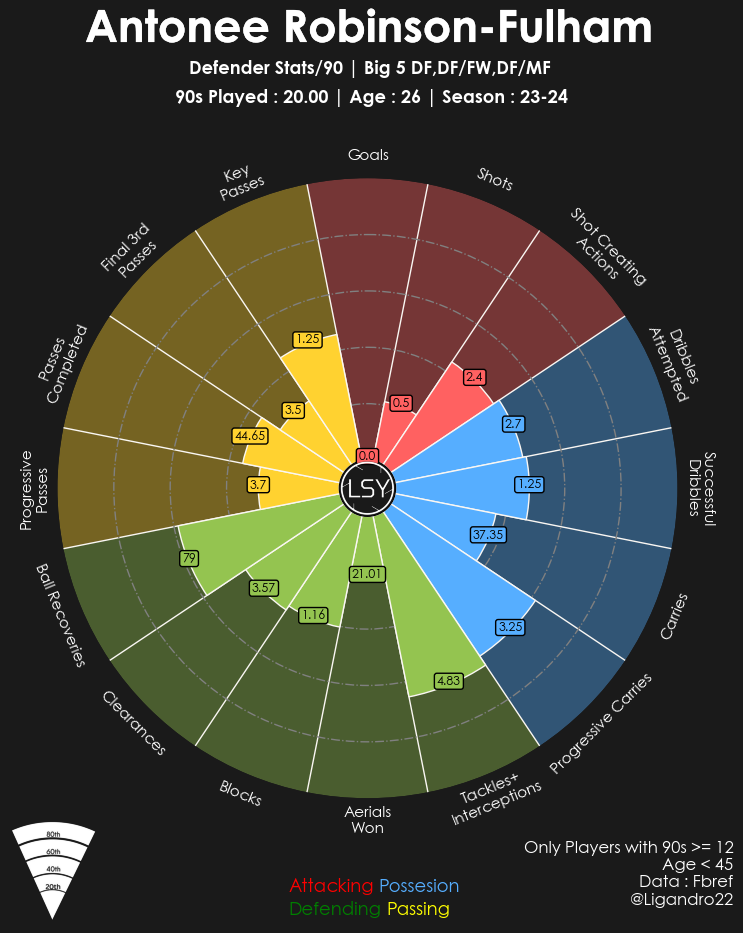

In [9]:
# a3 = "eng Premier League"
# a3 = "es La Liga"
# a3 = "it Serie A"
# a3 = "fr Ligue 1"
# a3 = "de Bundesliga"
a3 = "Big 5"
if a3 != "Big 5":
    prem = liga[liga["Comp"] == a3]
    League = a3[3:]
else:
    prem = liga.copy()
    League = a3
minutes = int(input("90s"))
age_limit = int(input("Age limit"))
prem = prem[prem["Min"] >= minutes*90 ]
if age_limit == 0 :
    prem = prem
else :
     prem = prem[prem["Age"] < age_limit]
x =selected_name
player = prem.loc[prem['Player']==x]
time = float(player.iloc[0,9]/90)
Name = str(player.iloc[0,0])
Team = str(player.iloc[0,3])
age =player.iloc[0,6]

kik = prem[(prem["Pos"] == "DF") | (prem["Pos"] == "DF,FW") | (prem["Pos"] =="DF,MF")]

# kik = prem[(prem["Pos"] == "DF,FW") | (prem["Pos"] =="DF,MF")]

# select stats
playe = list(player.iloc[0])

stat = []
stat.extend([playe[135],playe[136],playe[189],
        playe[228],playe[229],playe[233],playe[236],
        playe[261],playe[269],playe[280],
        playe[262],playe[252] ,playe[174],playe[152],playe[171],playe[170]])
lis = [135,136,189,228,229,233,236,261,269,280,262,252,174,152,171,170]
params = []
for x in lis:
    params.append(liga.columns[x])
params[0] = "Goals"
params[1] = "Shots"
params[2] = "Shot Creating\nActions"
params[3] = "Dribbles\nAttempted"
params[4] = "Successful\nDribbles"
params[5] = "Carries"
params[6] = "Progressive Carries"
params[7] = "Tackles+\nInterceptions"
params[8] = "Aerials\nWon"
params[9] = "Blocks"
params[10] = "Clearances"
params[11] = "Ball Recoveries"
params[12] = "Progressive\nPasses"
params[13] = "Passes\nCompleted"
params[14] = "Final 3rd\nPasses"
params[15] = "Key\nPasses"





# minimum range value and maximum range value for parameters
min_range= []
max_range =[]
for x in lis:
    min_range.append(kik.iloc[:,x].min())
    max_range.append(kik.iloc[:,x].max())          
stat1 = [ round(x, 2) for x in stat] 
stat1        
# color for the slices and text
slice_colors = ["#FF6161"] * 3 + ["#56AEFF"] * 4 + ["#94C450"] * 5 + ["#FFD230"] * 4
text_colors = ["black"] * 16 

# instantiate PyPizza class
baker = PyPizza(
    params=params,
    min_range=min_range,        # min range values
    max_range=max_range, 
    background_color="#FAF7F3",
    straight_line_color="#FAF7F3",  # color for straight lines
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_lw=0,               # linewidth of last circle
    other_circle_lw=1,              # linewidth for other circles
    inner_circle_size=10,
    other_circle_ls="-." 
)

colors = []
for x in params:
    colors.append("#EFEEED")
# plot pizza
fig, ax = baker.make_pizza(
    stat1,                          # list of values
    figsize=(8, 8.5),                # adjust figsize according to your need
    color_blank_space=slice_colors,        # use same color to fill blank space
    slice_colors=slice_colors,       # color for individual slices
    value_colors=text_colors,        # color for the value-text
    value_bck_colors=slice_colors,   # color for the blank spaces
    blank_alpha=0.4,                 # alpha for blank-space colors
    kwargs_slices=dict(
        edgecolor="#FAF7F3", zorder=2, linewidth=1
    ),                               # values to be used when plotting slices
    kwargs_params=dict(
        font = "STXihei",size =11,color="white",fontweight="bold", va="center"
    ),                               # values to be used when adding parameter
    kwargs_values=dict(
        font = "STXihei",size =9,color="white",fontweight="bold", zorder=3,
        bbox=dict(
        edgecolor="#000000", facecolor="cornflowerblue",
        boxstyle="round,pad=0.2", lw=1
        )
    )    
)


fig.set_facecolor('#1A1A1A')
ax.patch.set_facecolor('#1A1A1A')


# add title
fig.text(
0.515, 1.02, f"{Name}-{Team}",
path_effects=[path_effects.Stroke(linewidth=0.2, foreground="white"), path_effects.Normal()],
ha="center", font = "Century Gothic",size =32,color="white",fontweight="bold"
)

# add subtitle
fig.text(
0.515, 0.982,
f"Defender Stats/90 | {League} DF,DF/FW,DF/MF",
ha="center", font = "Century Gothic",size =13,color="white",fontweight="bold"
)
fig.text(
0.515, 0.948,
f" 90s Played : {time:.2f} | Age : {2023-age} | Season : 23-24",
ha="center", font = "Century Gothic",size =13,color="white",fontweight="bold"
)





# add credits
notes = f'Only Players with 90s >= {minutes}'
if age_limit == 0 :
    notes2 = f'No age filter'
else :
    notes2 = f'Age < {age_limit}'
CREDIT_1 = "Data : Fbref"
CREDIT_2 = "@Ligandro22"

fig.text(
0.97, 0.005, f"{notes}\n{notes2}\n{CREDIT_1}\n{CREDIT_2}",
font = "STXihei",size =12,color="white",fontweight="bold",
ha="right"
)

# add image
im1 = plt.imread(r"C:\Users\lolen\OneDrive\Documents\Coding\Neurotactic Essentials\Images\lsy.png")
ax_image = add_image(
im1, fig, left=0.472, bottom=0.455, width=0.08, height=0.08
) 


    # these values might differ when you are plotting
im3 = plt.imread(r'C:\Users\lolen\Downloads\Jupyter Mac\Football Viz\Neurotactic Work\Rating System\Images\perc.png')
ax_image = add_image(
im3, fig, left=0.06, bottom=-0.015, width=0.12, height=0.12
)   # these values might differ when you are plotting

str_text = f'''<Attacking> <Possesion>\n<Defending> <Passing>'''


fig_text(
    x = 0.414, y = -0.01, 
    s = str_text,highlight_textprops=[{'color':'red', 'weight':'bold'},{'color':'#56AEFF', 'weight':'bold'},{'color':'green', 'weight':'bold'},
                                      {'color':'yellow', 'weight':'bold'}],
    va = 'bottom', ha = 'left',fontname ="STXihei", weight = 'bold',
    fontsize = 13,color ='white'
)
plt.savefig("Pizza24.jpg",dpi =500, bbox_inches='tight')
